In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import re
import collections
from matplotlib.ticker import FuncFormatter

In [2]:
plt.style.use('ggplot')

In [3]:
def parse_log(filename):
    """Parse training log and return training and validation losses
    :params filename: path to log file
    :return training: ordered dictionary of training loss per iteration
    :return evaluation: ordered dictionary of loss on validation data
    """
    training = collections.OrderedDict()
    evaluation = collections.OrderedDict()
    with open(filename, "r") as f:
        ctr = 0
        for line in f:
            if "Epoch" in line:
                iteration = int(re.findall(r'i = (\d+)\s', line)[0].strip())
                loss = float(re.findall(r'loss = (\d.+)\w', line)[0].strip())
                training[iteration] = loss
                ctr = iteration
            elif "val" in line:
                evaluation[ctr] = float(re.findall(r'val_loss = \s{1,}(\d\.\d+)', line)[0].strip())
    return training, evaluation

In [4]:
def plot_losses(training, validation):
    """Plot graph of training and validation losses"""
    train_x = [k for k,v in training.items()]
    train_y = [v for k, v in training.items()]
    val_x = [k for k,v in validation.items()]
    val_y = [v for k,v in validation.items()]
    fig, ax = plt.subplots(figsize=(14,7))
    ax.plot(train_x, train_y, label="Training Loss")
    ax.plot(val_x, val_y, lw=4, label="Validation Loss")
    ax.set_ylim(0, 4.5)
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
    legend = ax.legend(fontsize=16)
    for legobj in legend.legendHandles:
        legobj.set_linewidth(4.0)
    plt.show()

Attempt 1: RNN 2 layers

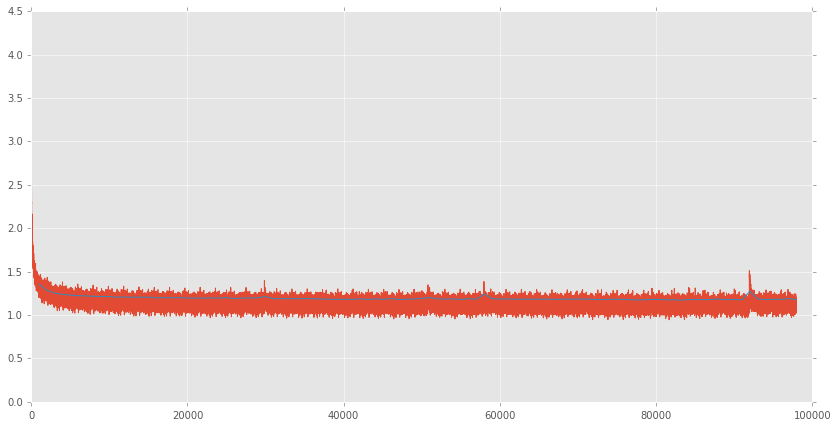

In [31]:
training, evaluation = parse_log("Logs/train.log")
plot_losses(training, evaluation)

In [32]:
k = min(evaluation, key=evaluation.get)
print("Best evaluation loss:")
print(k, evaluation[k])
k = min(training, key=training.get)
print("\nBest training loss:")
print(k, training[k])

Best evaluation loss:
83000 1.1713961958885

Best training loss:
81659 0.94482


Attempt 2: LSTM 2 layers

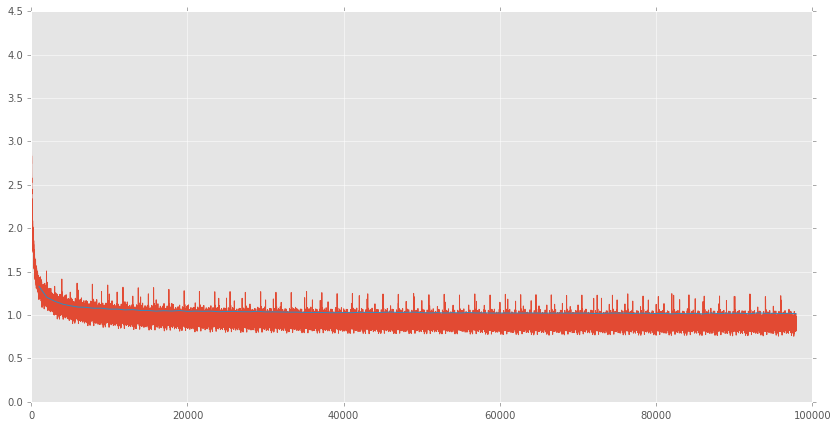

In [33]:
training, evaluation = parse_log("Logs/train_2.log")
plot_losses(training, evaluation)

In [34]:
k = min(evaluation, key=evaluation.get)
print("Best evaluation loss:")
print(k, evaluation[k])
k = min(training, key=training.get)
print("\nBest training loss:")
print(k, training[k])

Best evaluation loss:
86000 1.0121991492686

Best training loss:
97615 0.75558


Attempt 3: LSTM 3 layers

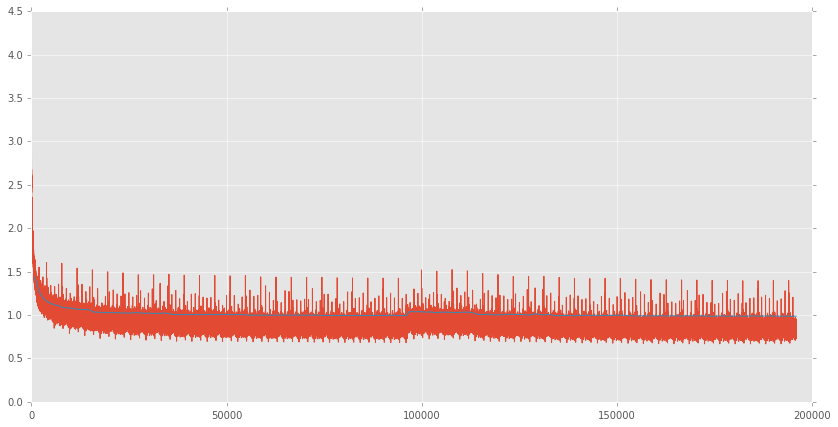

In [19]:
training, evaluation = parse_log("Logs/train_3_complete.log")
plot_losses(training, evaluation)

In [22]:
k = min(evaluation, key=evaluation.get)
print("Best evaluation loss:")
print(k, evaluation[k])
k = min(training, key=training.get)
print("\nBest training loss:")
print(k, training[k])

Best evaluation loss:
32000 0.9418283928879

Best training loss:
32471 0.62628


In [ ]:
Attempt 4

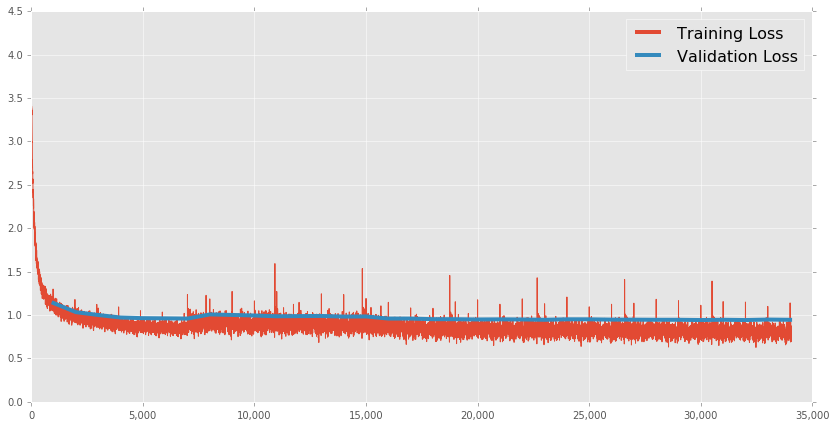

In [26]:
training, evaluation = parse_log("Logs/train_4_complete.log")
plot_losses(training, evaluation)

In [44]:
k = min(evaluation, key=evaluation.get)
print("Best evaluation loss:")
print(k, evaluation[k])
k = min(training, key=training.get)
print("\nBest training loss:")
print(k, training[k])

Best evaluation loss:
32000 0.9418283928879

Best training loss:
32471 0.62628
